# Lista de Exercícios de MegaDados

## Exercício 1)

Um cliente deseja fazer uma base de dados para catalogar super-heróis e supervilães dos quadrinhos. Temos os
seguintes requerimentos:

- Um super-herói ou supervilão tem um nome real e um nome de herói/vilão (e.g. Bruce Wayne / Batman, Selina Kyle / Catwoman)
- Todo super-herói tem um ou mais arqui-inimigos
- Um super-herói tem ao menos um superpoder, e potencialmente vários
     - O superpoder tem um nível de intensidade, que é um valor real positivo
     
**a)** Construa o diagrama do modelo entidade-relacionamento deste problema


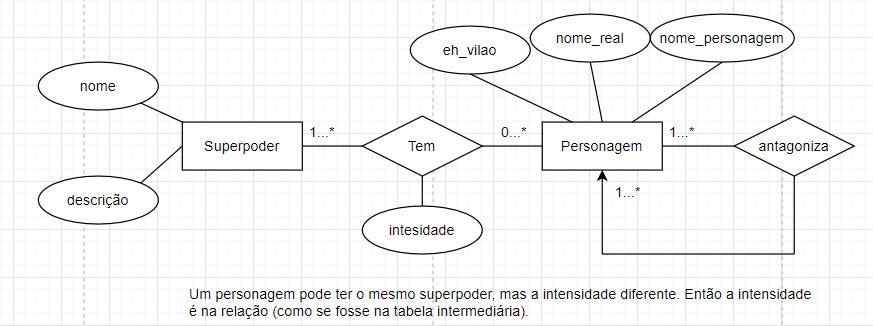

- Nessa situação o vilão pode ter poder;
- E pode ter antagonização de heroi x heroi e vilão x vilão

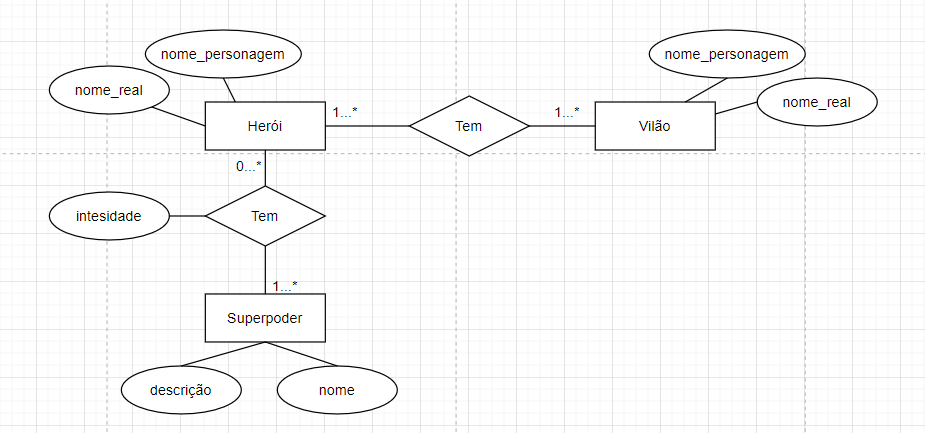

- Nessa situação o vilão não tem poder, apenas o heroi.
- Não tem heroi x heroi e nem vilão x vilão.

**b)** Construa o diagrama do modelo relacional para este problema


- Para o primeiro caso:

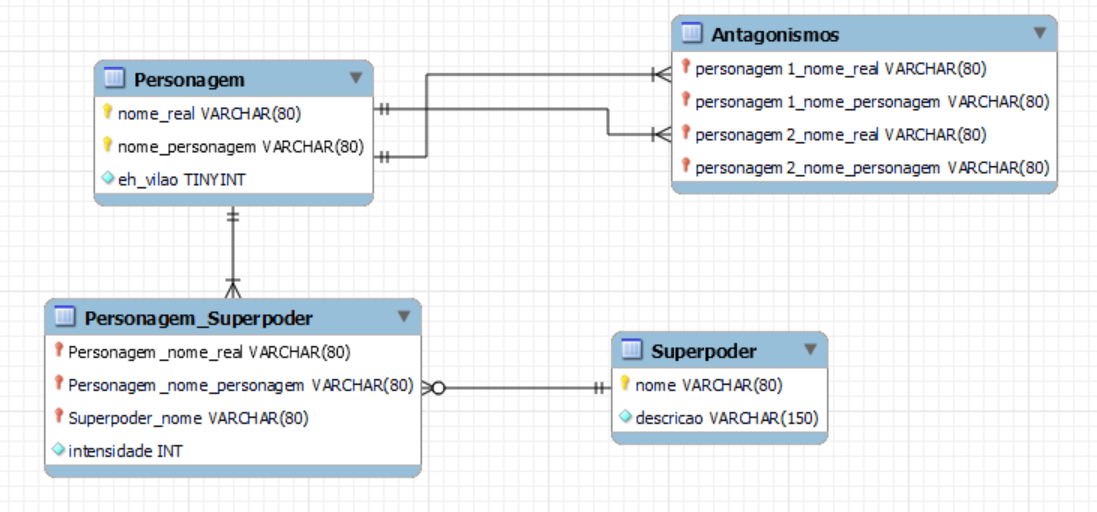


- Para o segundo caso:
    
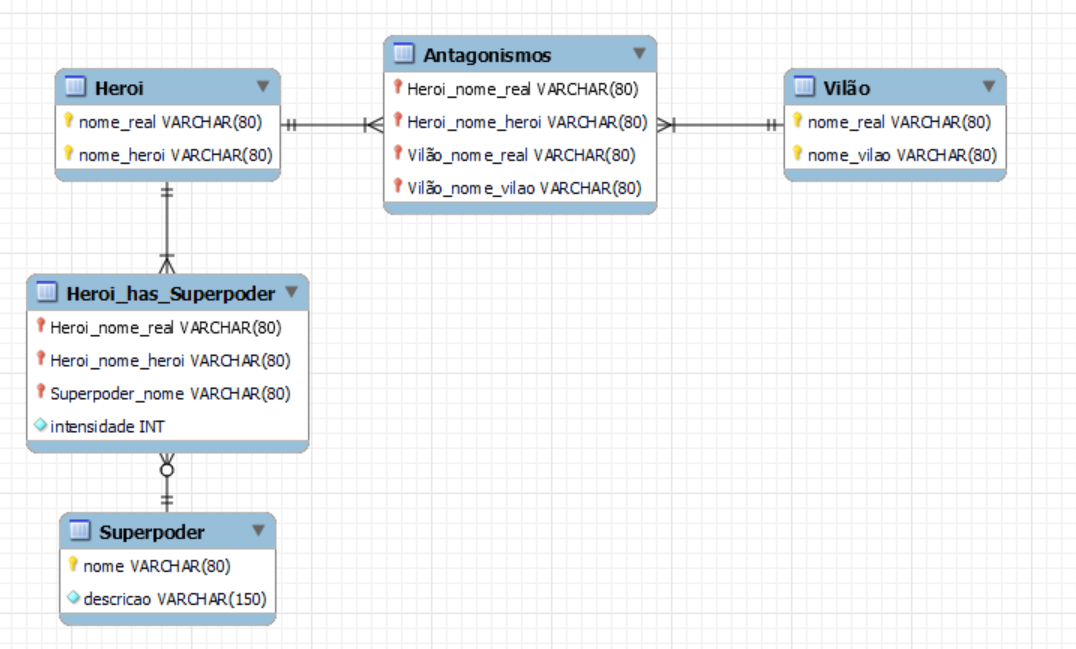

## Exercício 2)

Em uma relação 𝑅(𝐴, 𝐵, 𝐶,𝐷, 𝐸) valem as seguintes dependências funcionais: 𝐵𝐶 → 𝐴, 𝐴 → 𝐶, 𝐶 → 𝐷, 𝐷 → 𝐸

**a)** Determine a chave primária

Primeiramente precisamos encontrar as chaves candidatas, que são as superchaves irredutíveis. Sendo assim, temos como candidatas:

- BC, BA.

Vamos escolher BC como chave primária.

**b)** Determine qual a forma normal desta relação. Explique.

Com a chave primária sendo BC, a forma da relação é:

- Formado por colunas com valores simples OK 1NF (caso contrário nem relação teríamos);
- Não há dependência parcial NÃO (D depende apenas de C, ou seja, parcialmente da PK BC)
- Não há dependência transitiva NÃO.

Portanto com BC como PK, temos 1NF

--------------------------------------------------------------------

Com a chave primária sendo BA, a forma da relação é:
- Formado por colunas com valores simples OK 1NF (caso contrário nem relação teríamos);
- Não há dependência parcial NÃO (pois A determina C, ou seja, C depende parcialmente da PK BA)

Portanto com BA, temos 1NF

c) Identifique uma possível anomalia nesta relação. Qualquer uma.

No caso de BC, podemos ter inconsistências de informação no seguinte: BC determina A e A determina C. Esse C do BC que determina A pode ser diferente do C que é determinado por A. Exemplo, supondo que :
- B é a raça do cachorro
- C a idade do cachorro
- A é o tamanho

Podemos ter uma tabela:

| Raça cachorro (B) | Idade   (C)     |  Tamanho (A)|
|----------------|--------------|-----------------------|
| Golden   | 10          | 56 cm|
| Pitbull | 5          | 56cm |

Perceba que B e C determinam A. Mas A não determina C. Logo existem inconsistências e a dependência não é cumprida por conta de como está sendo representada. Teríamos que escolher apenas 1 das relações. 


d) Construa a normalização para a 3NF.

𝐵𝐶 → 𝐴, 𝐴 → 𝐶, 𝐶 → 𝐷, 𝐷 → 𝐸

- R(A, B, C): BC é PK. (𝐵𝐶 → 𝐴, 𝐴 → 𝐶 - pediu 3NF não BCNF, se fosse BCNF teríamos que ter BC → BC e A → C, ou seja, optar por apenas uma relação já que BC é a PK e determina A e A que não faz parte da PK determina exatamente alguém da PK).

Mas se quiser, posso separar:

- U (A, C) : A é PK (𝐴 → 𝐶)

- S(C, D) : C é PK (𝐶 → 𝐷).

- T(D, E) : D é PK (𝐷 → 𝐸)

## Exercício 3)

Em uma relação 𝑅(𝐴, 𝐵, 𝐶,𝐷) vale apenas a seguinte dependência funcional não-trivial: 𝐴𝐵 → 𝐶. Determine:

**b)** A chave primária

Temos como chaves candidatas:

ABD, ABCD (caso comece pegando apenas o C, também terei que pegar D e AB - pois o C não determina nenhum deles).

Logo a PK é ABD.

**b)** A forma normal da relação

Com a chave primária sendo ABD, a forma da relação é:

- Formado por colunas com valores simples OK 1NF (caso contrário nem relação teríamos);
- Não há dependência parcial NÃO (C depende apenas de AB e não de ABD - que é a PK).

Portanto com ABD como PK, temos 1NF.

**c)** Uma normalização para a 3NF.

- R(A, B, C) : AB como PK. (𝐴𝐵 → C)
- S(A, B, D) : D como PK (ABD → ABD).

## Exercício 4) 

Em uma cidade temos vários parques públicos. A prefeitura resolveu privatizar a zeladoria de todos eles: existe um
conjunto de empresas administradoras, cada uma delas responsável por alguns parques da cidade. Para monitorar o
trabalho dessas empresas, a prefeitura criou o aplicativo “Fiscais do Parque”, onde usuários podem notificar
ocorrências indesejáveis.

O modelo entidade-relacionamento que representa esse cenário é visto abaixo:

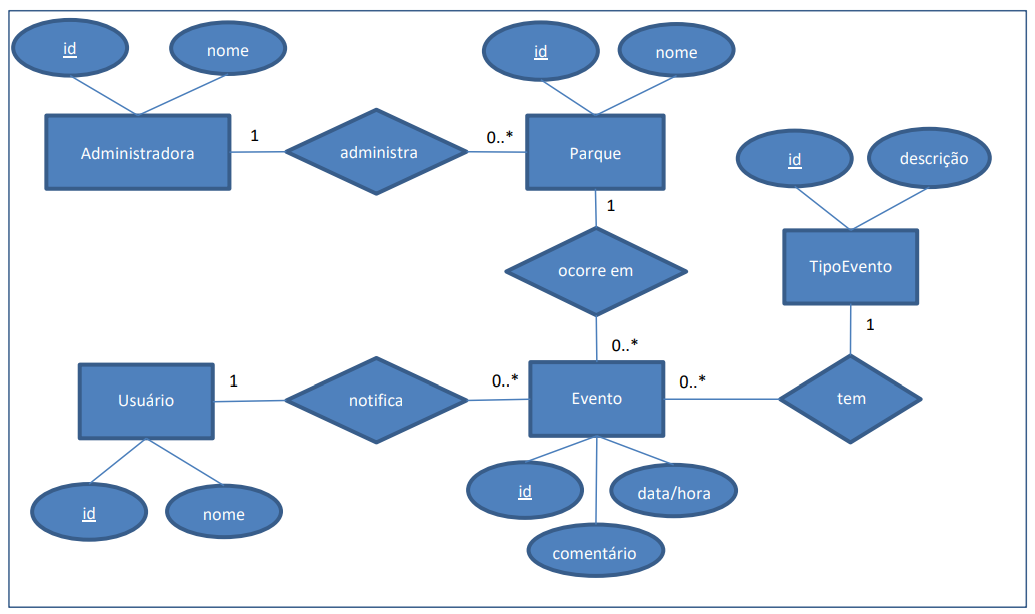

O modelo relacional correspondente ao design acima é visto a seguir:

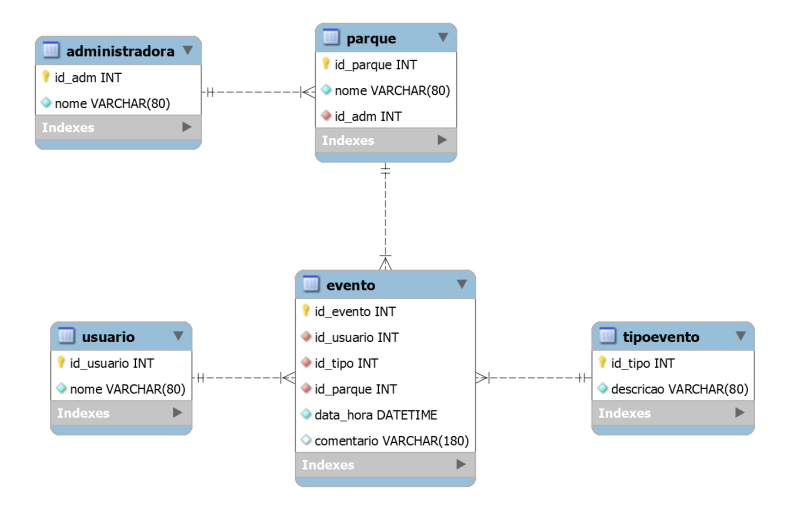

In [1]:
import mysql.connector
from functools import partial


def get_connection_helper():

    def run_db_query(connection, query, args=None):
        with connection.cursor() as cursor:
            print('Executando query:')
            cursor.execute(query, args)
            for result in cursor:
                print(result)

    connection = mysql.connector.connect(
        host='localhost',
        user='megadados',
        password='megadados',
        database='parques',
    )
    return connection, partial(run_db_query, connection)


connection, db = get_connection_helper()

O script pf.sql contém código para criar esse banco de dados no MySQL e também adiciona dados de exemplo,
usem a vontade para testar as respostas das questões da prova!

**a)** Escreva uma query que liste todas as administradoras, ordenadas por número de eventos de segurança
ocorridos nos parques que administram. Pegadinha: e se não houve evento de segurança em seus parques?


In [2]:
db('SELECT * FROM tipoevento')

Executando query:
(1, 'Segurança')
(2, 'Limpeza')
(3, 'Atendimento')
(4, 'Infraestrutura')


In [9]:
db('''
SELECT
    DISTINCT(id_adm), administradora.nome, COUNT(id_evento) as n_eventos_seguranca
FROM
    administradora
    LEFT OUTER JOIN parque USING (id_adm)
    LEFT OUTER JOIN evento USING (id_parque)
WHERE
    id_tipo = 1
GROUP BY
    id_adm
ORDER BY
    n_eventos_seguranca DESC
''')

Executando query:
(1, 'Fundação Fundão', 207)
(4, 'Grupo Gripe', 130)
(3, 'Sociedade dos Sócios', 105)
(2, 'Instituto Instigare', 54)


**b)** Crie uma tabela temporária Total que tem as colunas (id_usuario, total) onde a coluna total indica o
número total de eventos notificados pelo usuário id_usuario.


In [13]:
db('DROP TEMPORARY TABLE IF EXISTS Total')

db('''
CREATE TEMPORARY TABLE Total
    SELECT
        id_usuario, nome, COUNT(id_evento) as total
    FROM
        usuario
        LEFT OUTER JOIN evento USING (id_usuario)
    GROUP BY
        id_usuario
''')

db('SELECT * FROM Total')

Executando query:
Executando query:
Executando query:
(1, 'Assis G. Lopes', 45)
(2, 'José D. Gomes da Silva', 43)
(3, 'Giovana C. Oliveira', 37)
(4, 'Assis C. Chaves', 41)
(5, 'Pedro E. Merkel', 41)
(6, 'Maria C. Furuya', 44)
(7, 'Jonas B. Lopes', 35)
(8, 'Fernanda F. Gomes da Silva', 48)
(9, 'Herminia D. Santos', 47)
(10, 'Joana A. Gomes da Silva', 42)
(11, 'Leandro B. Oliveira', 42)
(12, 'Estela A. Santos', 33)
(13, 'Franklin B. Barbosa', 44)
(14, 'Carmen E. Furuya', 37)
(15, 'Joana G. Barbosa', 46)
(16, 'Carla E. Oliveira', 40)
(17, 'José G. Pereira', 31)
(18, 'Sonia C. Lopes', 35)
(19, 'Maria D. dos Santos', 49)
(20, 'Jonas B. Santos', 37)
(21, 'Herminia C. Oliveira', 37)
(22, 'Carla G. Merkel', 50)
(23, 'Giovana B. Soares', 46)
(24, 'Herminia F. Barbosa', 30)
(25, 'Sonia F. Mitterrand', 30)
(26, 'Maria F. Oliveira', 31)
(27, 'Giovana A. Furuya', 41)
(28, 'Jonas E. Chaves', 35)
(29, 'Pedro G. Chateaubriand', 35)
(30, 'Assis E. Gomes da Silva', 41)
(31, 'Pedro F. Chateaubriand', 36)

**c)** Crie uma tabela temporária chamada UsuarioParque que tem as colunas (id_usuario, id_parque,
contagem) onde contagem é o número de eventos que o usuário id_usuario notificou acerca do parque
id_parque. Dica: GROUP BY permite agrupar por múltiplas colunas.


In [16]:
db('DROP TEMPORARY TABLE IF EXISTS UsuarioParque')

db('''
CREATE TEMPORARY TABLE UsuarioParque
    SELECT
        id_usuario, id_parque, COUNT(id_evento) as contagem
    FROM
        usuario
        LEFT OUTER JOIN evento USING (id_usuario)
    GROUP BY
        id_usuario, id_parque
    ORDER BY
        contagem DESC
''')

db('SELECT * FROM UsuarioParque')

Executando query:
Executando query:
Executando query:
(48, 2, 13)
(13, 10, 11)
(14, 6, 11)
(1, 10, 10)
(9, 2, 10)
(19, 4, 10)
(21, 9, 10)
(15, 9, 9)
(35, 4, 9)
(37, 2, 9)
(42, 5, 9)
(1, 5, 8)
(2, 5, 8)
(22, 10, 8)
(22, 6, 8)
(23, 7, 8)
(23, 3, 8)
(26, 5, 8)
(32, 2, 8)
(35, 6, 8)
(36, 10, 8)
(36, 1, 8)
(37, 4, 8)
(44, 2, 8)
(2, 7, 7)
(2, 8, 7)
(2, 3, 7)
(5, 8, 7)
(5, 3, 7)
(6, 10, 7)
(8, 8, 7)
(8, 9, 7)
(10, 2, 7)
(10, 3, 7)
(11, 5, 7)
(11, 7, 7)
(12, 2, 7)
(15, 6, 7)
(16, 3, 7)
(16, 2, 7)
(17, 3, 7)
(18, 8, 7)
(26, 1, 7)
(27, 8, 7)
(28, 8, 7)
(30, 6, 7)
(30, 4, 7)
(31, 6, 7)
(32, 9, 7)
(35, 5, 7)
(37, 5, 7)
(37, 8, 7)
(37, 3, 7)
(38, 9, 7)
(39, 4, 7)
(43, 2, 7)
(44, 6, 7)
(46, 8, 7)
(46, 10, 7)
(47, 9, 7)
(49, 7, 7)
(1, 1, 6)
(4, 1, 6)
(6, 8, 6)
(6, 1, 6)
(7, 6, 6)
(8, 7, 6)
(8, 2, 6)
(11, 1, 6)
(11, 8, 6)
(13, 1, 6)
(13, 7, 6)
(15, 4, 6)
(18, 5, 6)
(19, 3, 6)
(19, 9, 6)
(19, 10, 6)
(22, 2, 6)
(22, 3, 6)
(24, 9, 6)
(25, 5, 6)
(26, 7, 6)
(27, 10, 6)
(28, 1, 6)
(29, 3, 6)
(30, 10, 6)
(32

**d)** Um usuário é um fã de um parque se a fração de eventos que ele notifica para o parque, em relação ao número
total de eventos que ele notificou para todos os parques, é superior a 20%. Usando as tabelas temporárias acima
(mesmo que não as tenha desenvolvido) faça uma query que lista os usuários que são fãs de dois ou mais
parques.


In [27]:
# fã se:  numero de eventos para o parque/ numero total de eventos em todos parques é > 0.2

db('''
SELECT
    id_usuario, COUNT(id_usuario) as dois_ou_mais, (contagem/total)*100
FROM
    Total
    INNER JOIN UsuarioParque USING (id_usuario)
WHERE
     (contagem/total)*100 > 20
GROUP BY
    id_usuario
HAVING
    dois_ou_mais >= 2
''')

Executando query:
(26, 2, Decimal('25.8065'))
(36, 2, Decimal('21.0526'))


In [28]:
connection.close()

**e)** Suponha que desejamos modificar os requerimentos do problema da seguinte forma:

• A cidade será dividida em regiões. Cada região tem um nome, um id, e um subprefeito. Podemos ter regiões
sem parques.

• Todos os parques de uma região são administrados pela mesma empresa administradora.

Modifique o diagrama do modelo entidade-relacionamento para incorporar essa mudança. Não precisa redesenhar
o diagrama completo, apenas as partes relacionadas com a mudança.

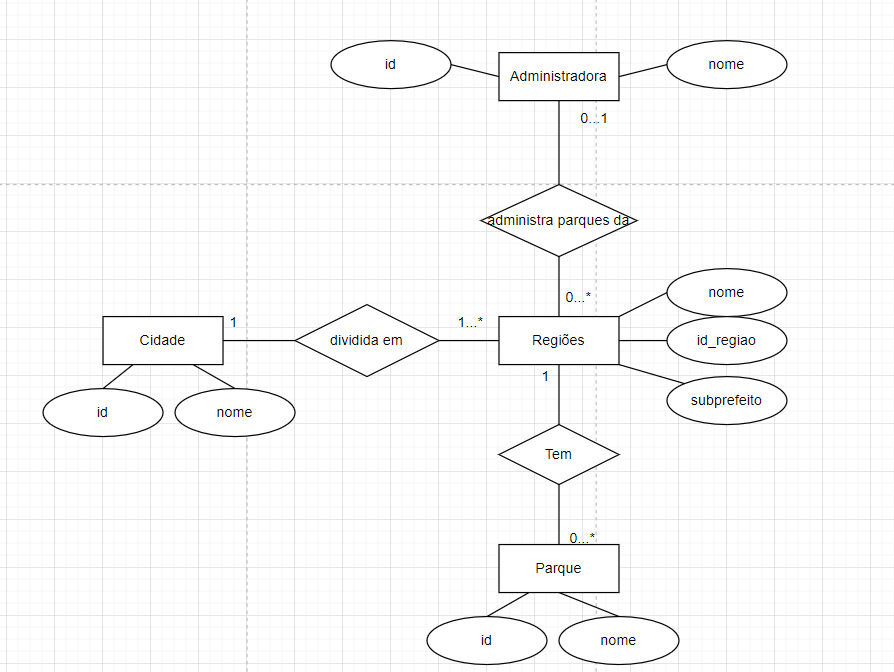


**f)**Modifique o diagrama do modelo relacional para incorporar a mudança do item anterior. Não precisa
redesenhar o diagrama completo, apenas as partes relacionadas com a mudança.

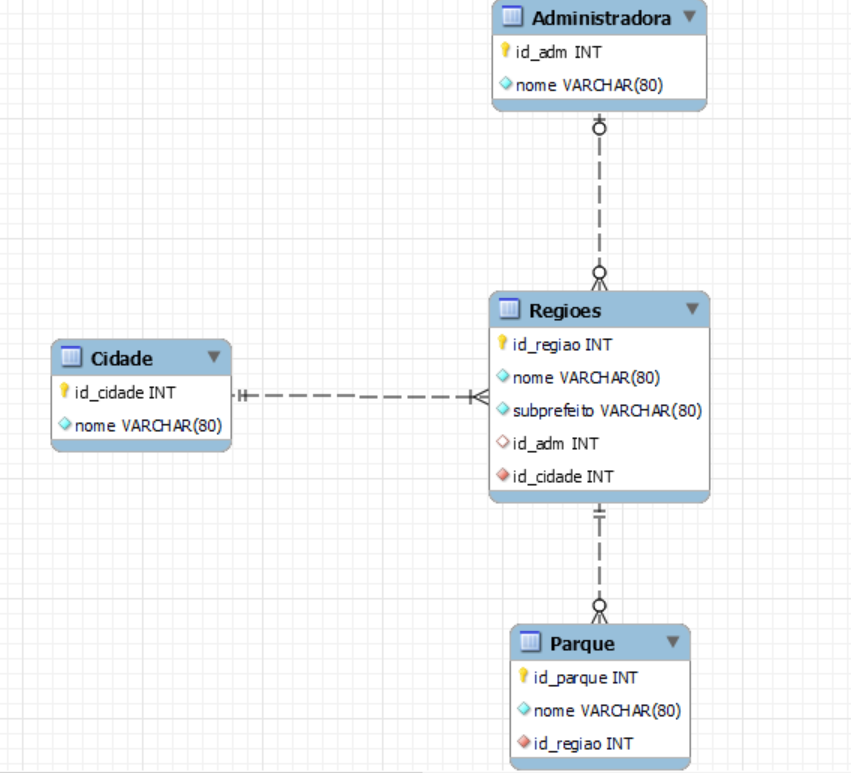

## Exercício 5)

“Lo marqué un poco con la cabeza y un poco con la mano de Dios” – Maradona

Na Copa do Mundo de 1986 (vosso professor tinha 11 anos – eu vi!) a Argentina disputava com a Inglaterra uma
partida das quartas-de-final. No início do segundo tempo Maradona sobe para cabecear e golpeia a bola com a mão,
vencendo o goleiro e marcando um gol que deveria ser anulado, mas que foi validado pelo árbitro. Esse gol ficou
conhecido como “A Mão de Deus”. Quatro minutos depois Maradona dribla quatro defensores ingleses e o goleiro,
marcando o gol que ficou conhecido como “O Gol do Século”, considerado um dos mais bonitos de todas as Copas.
Curioso a respeito desses gols históricos, você decidiu fazer um banco de dados de gols em Copas do Mundo. Eis os
requisitos:

- Cada partida envolve dois times, claro.
- O gol é marcado por um jogador, claro.
- O jogador pertence a um time, claro.
- A partida tem um local e data, claro.
- O gol pode ter um apelido.
- O gol é marcado com uma parte do corpo: cabeça, perna direita, perna esquerda, mão direita, mão esquerda (Maradona provou que dá), etc.
- O gol é marcado em um certo minuto da partida, claro.

**a)** ) Construa o diagrama entidade-relacionamento para este problema.


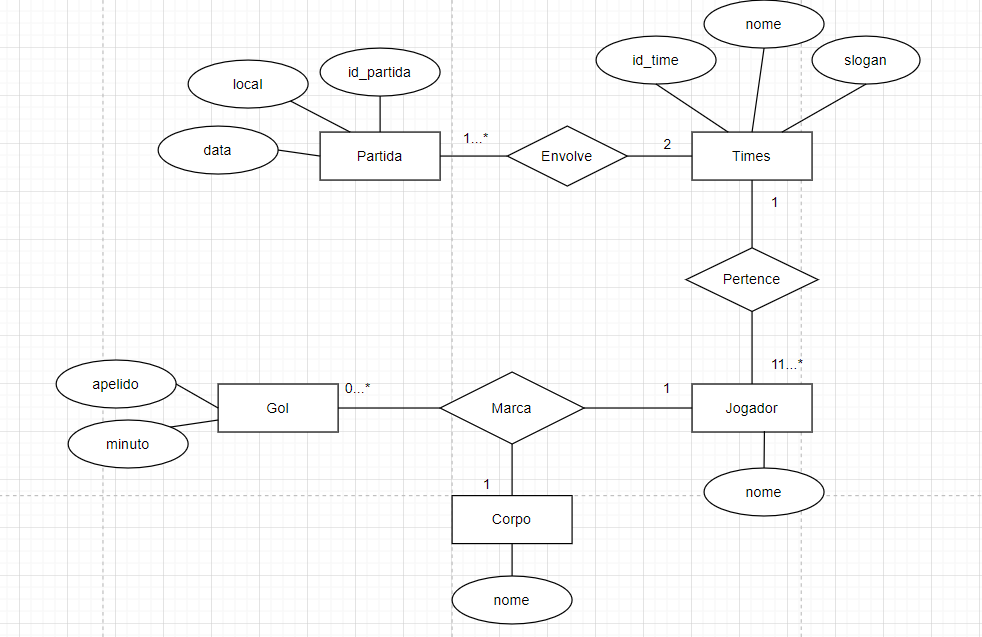

**b)** Construa o diagrama do modelo relacional para este problema.

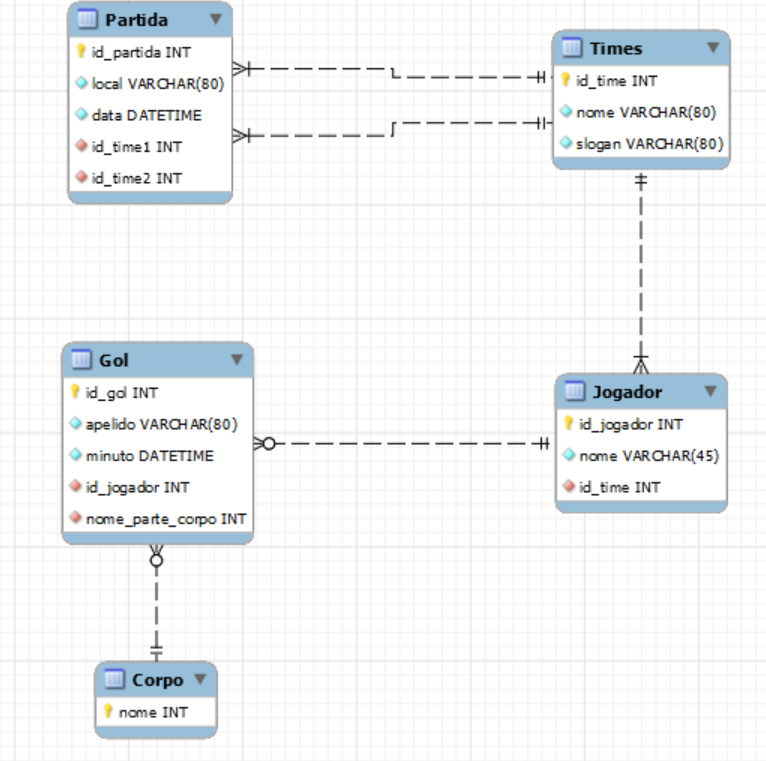